# JD filtering

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from astropy.coordinates import SkyCoord
from functools import partial
import os
os.environ['ucac4_path'] = '/home/jovyan/work/support/ucac4/UCAC4'
os.chdir('/home/jovyan/work/src')
import do_charts_vast
import reading
import utils
from star_description import StarDescription
%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

found environ with ucac45 path /home/jovyan/work/support/ucac4/UCAC4
Ucac path is /home/jovyan/work/support/ucac4/UCAC4


## Supporting functions

In [2]:
def massage_df_for_phase_plot(df: DataFrame):
    df['floatJD'] = df['JD'].astype(np.float)
    df['realV'] = df['Vrel']
    df['realErr'] = df['err']
    return df

In [3]:
def read_light_curve(star_id):
    df = reading.read_lightcurve_vast(f"../tests/data/outliers/out{star_id:05}.dat")
    return massage_df_for_phase_plot(df)

def plot_star(star_id, jdfilters):
    df = read_light_curve(star_id)
    if jdfilters is not None:
        print("before filtering: ", len(df))
        df = utils.jd_filter_df(df, jdfilters)
        print("after filtering: ", len(df))
    return plot_star_df(star_id, df, None)

def plot_star_df(star_id, df, cleaning_func):
    star = StarDescription(local_id=star_id, coords=SkyCoord(ra=5.6, dec=-72, unit='deg'))
    print("curve before cleaning:", len(df))
    period = do_charts_vast.calculate_ls_period_from_df(df)
    print("using period", period)
    plt, t, lc = do_charts_vast.plot_lightcurve_raw(star, df, "bla", write_plot=False)
    print("curve after cleaning:", len(lc))
    plt.show()
    return t, lc

def none_phase_filter(time, lc):
    return time, lc

## Reading light curves

In [4]:
test_curve = read_light_curve(3855)
print(len(test_curve))
test_curve['floatJD'].describe()

8086


count    8.086000e+03
mean     2.456792e+06
std      1.138853e+02
min      2.456679e+06
25%      2.456722e+06
50%      2.456743e+06
75%      2.456781e+06
max      2.457024e+06
Name: floatJD, dtype: float64

before filtering:  8086
after filtering:  7047
curve before cleaning: 7047
using period period(period=0.14677465279993088, origin='LS')
curve after cleaning: 7047


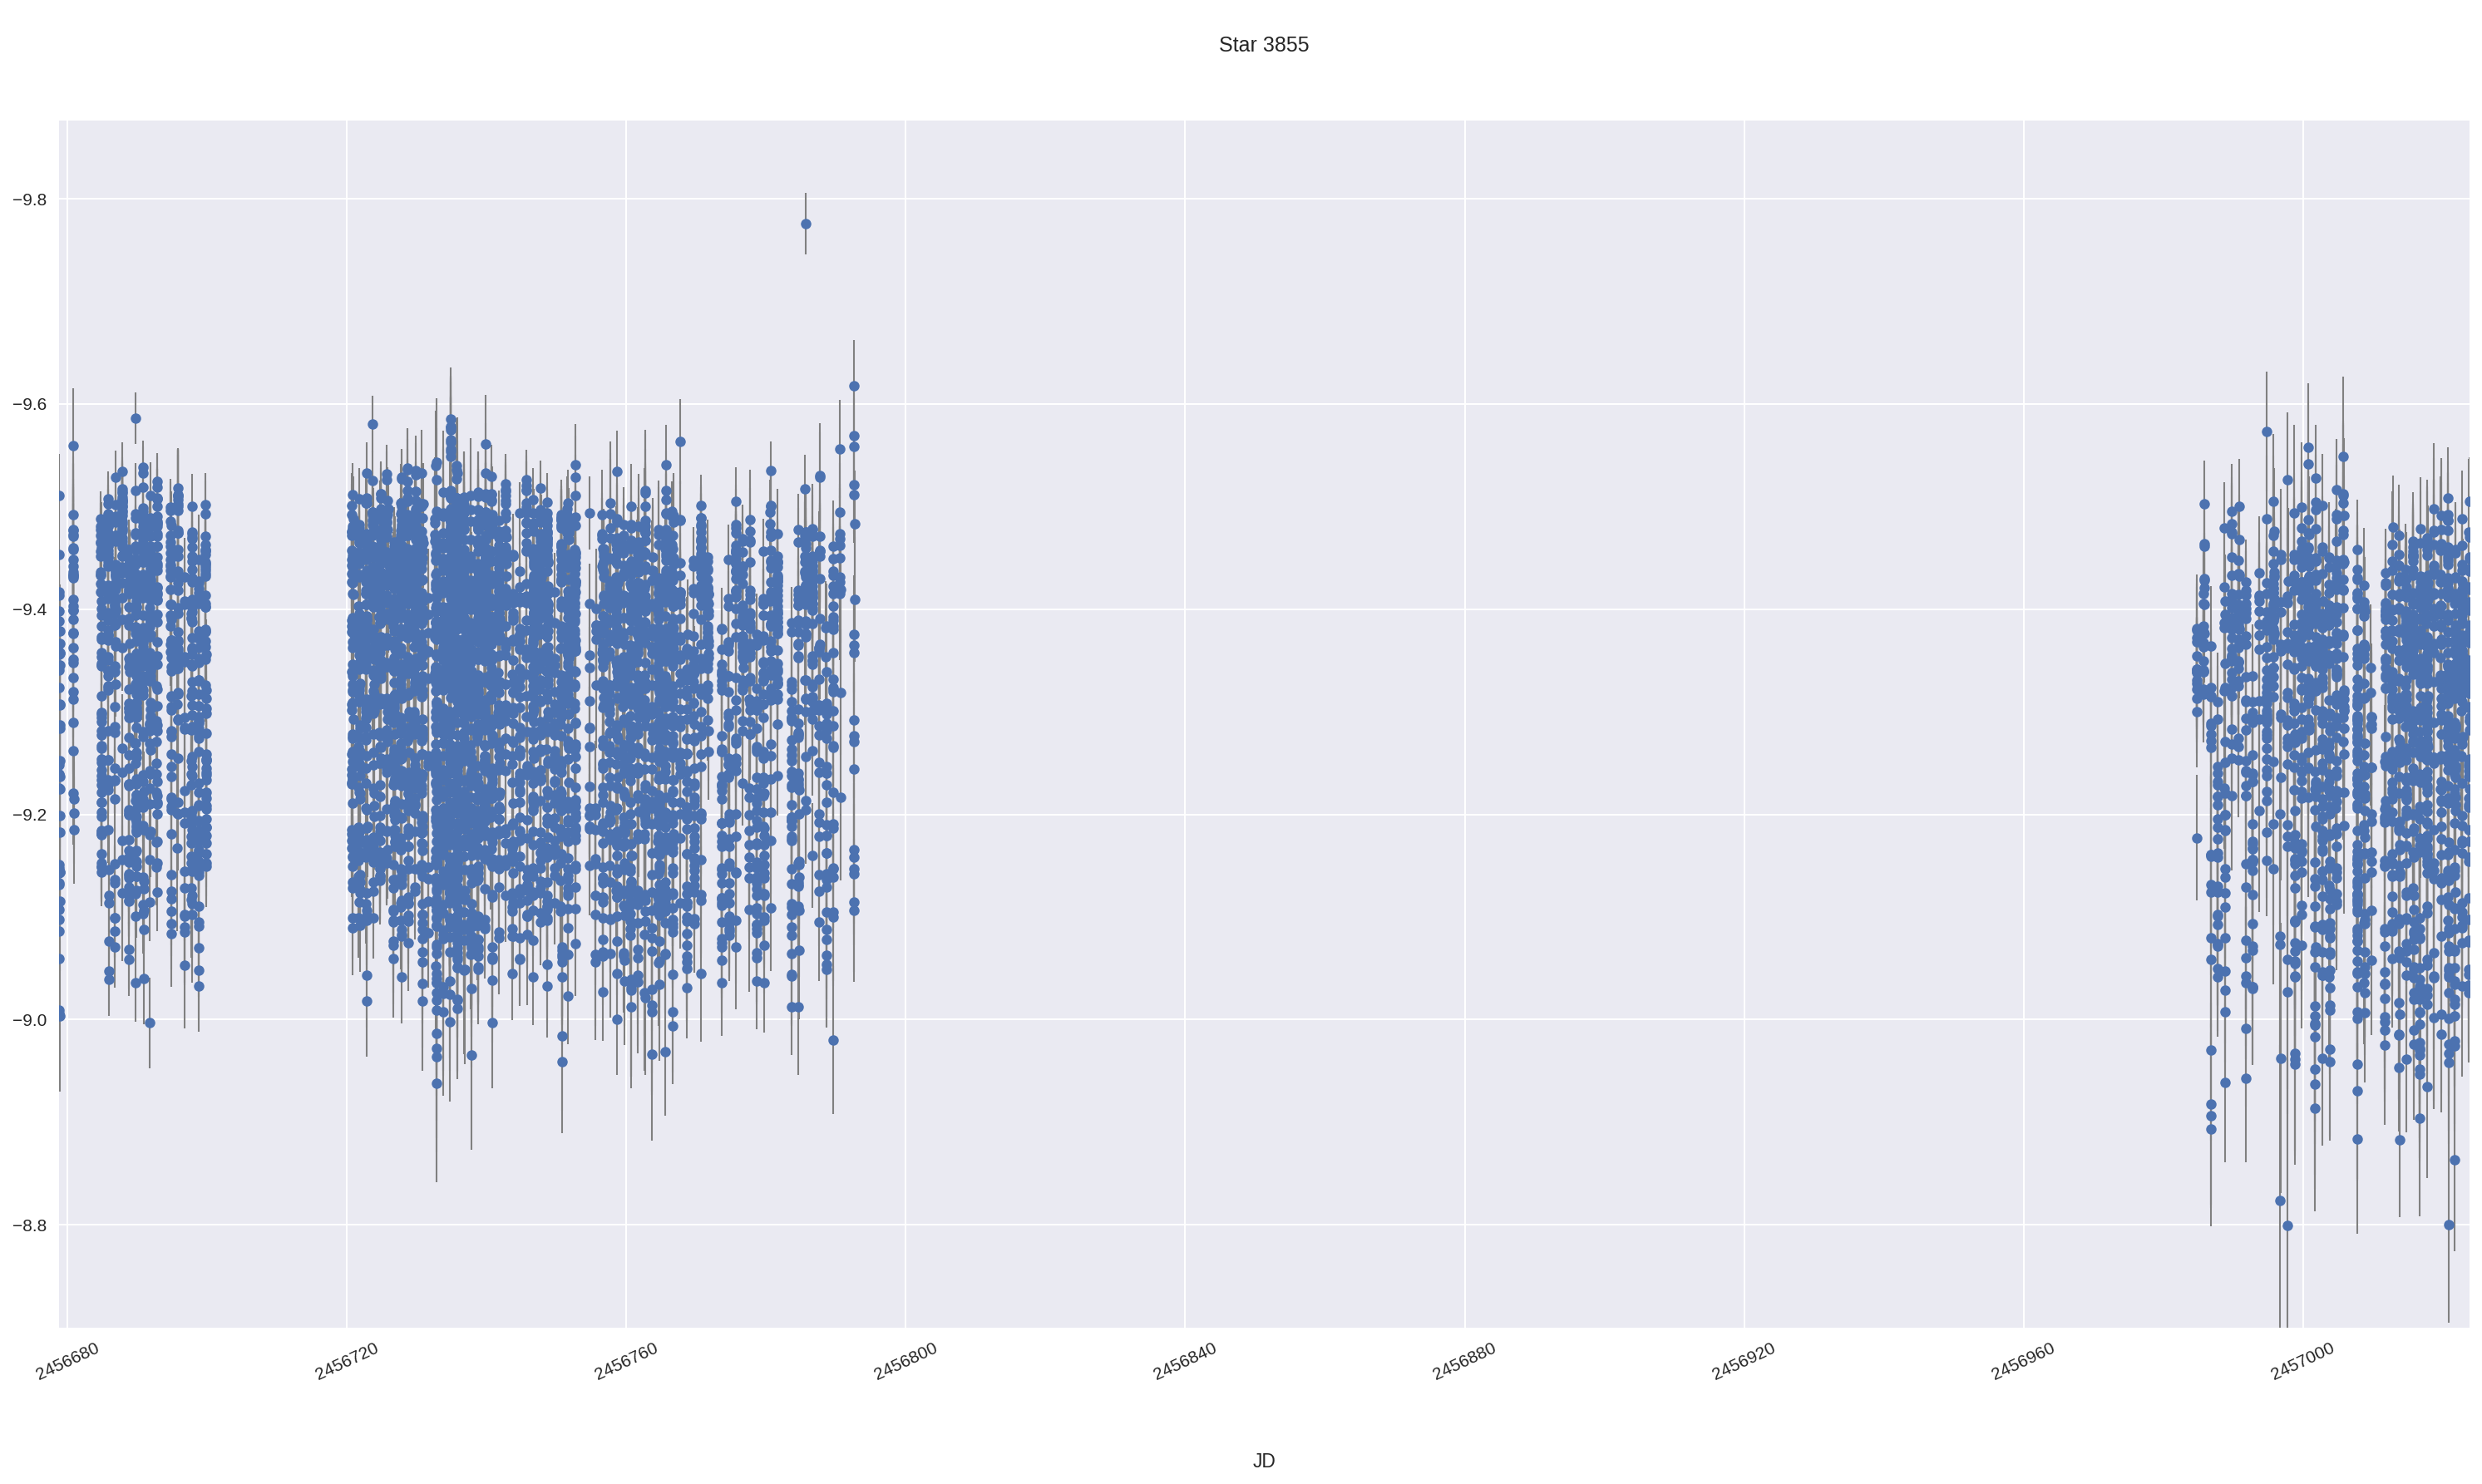

CPU times: user 1.64 s, sys: 153 ms, total: 1.79 s
Wall time: 1.62 s


In [5]:
stars = [3855, 7668, 9235]
one_star = [3855]
t=[]
lc=[]
def plot_stars(stars, outlier_func):
    for star in stars:
        t, lc = plot_star(star, [2456700.0, 2456720.0])

%time plot_stars(one_star, none_phase_filter)

before filtering:  8086
after filtering:  7047
curve before cleaning: 7047
using period period(period=0.14677465279993088, origin='LS')
curve after cleaning: 7047


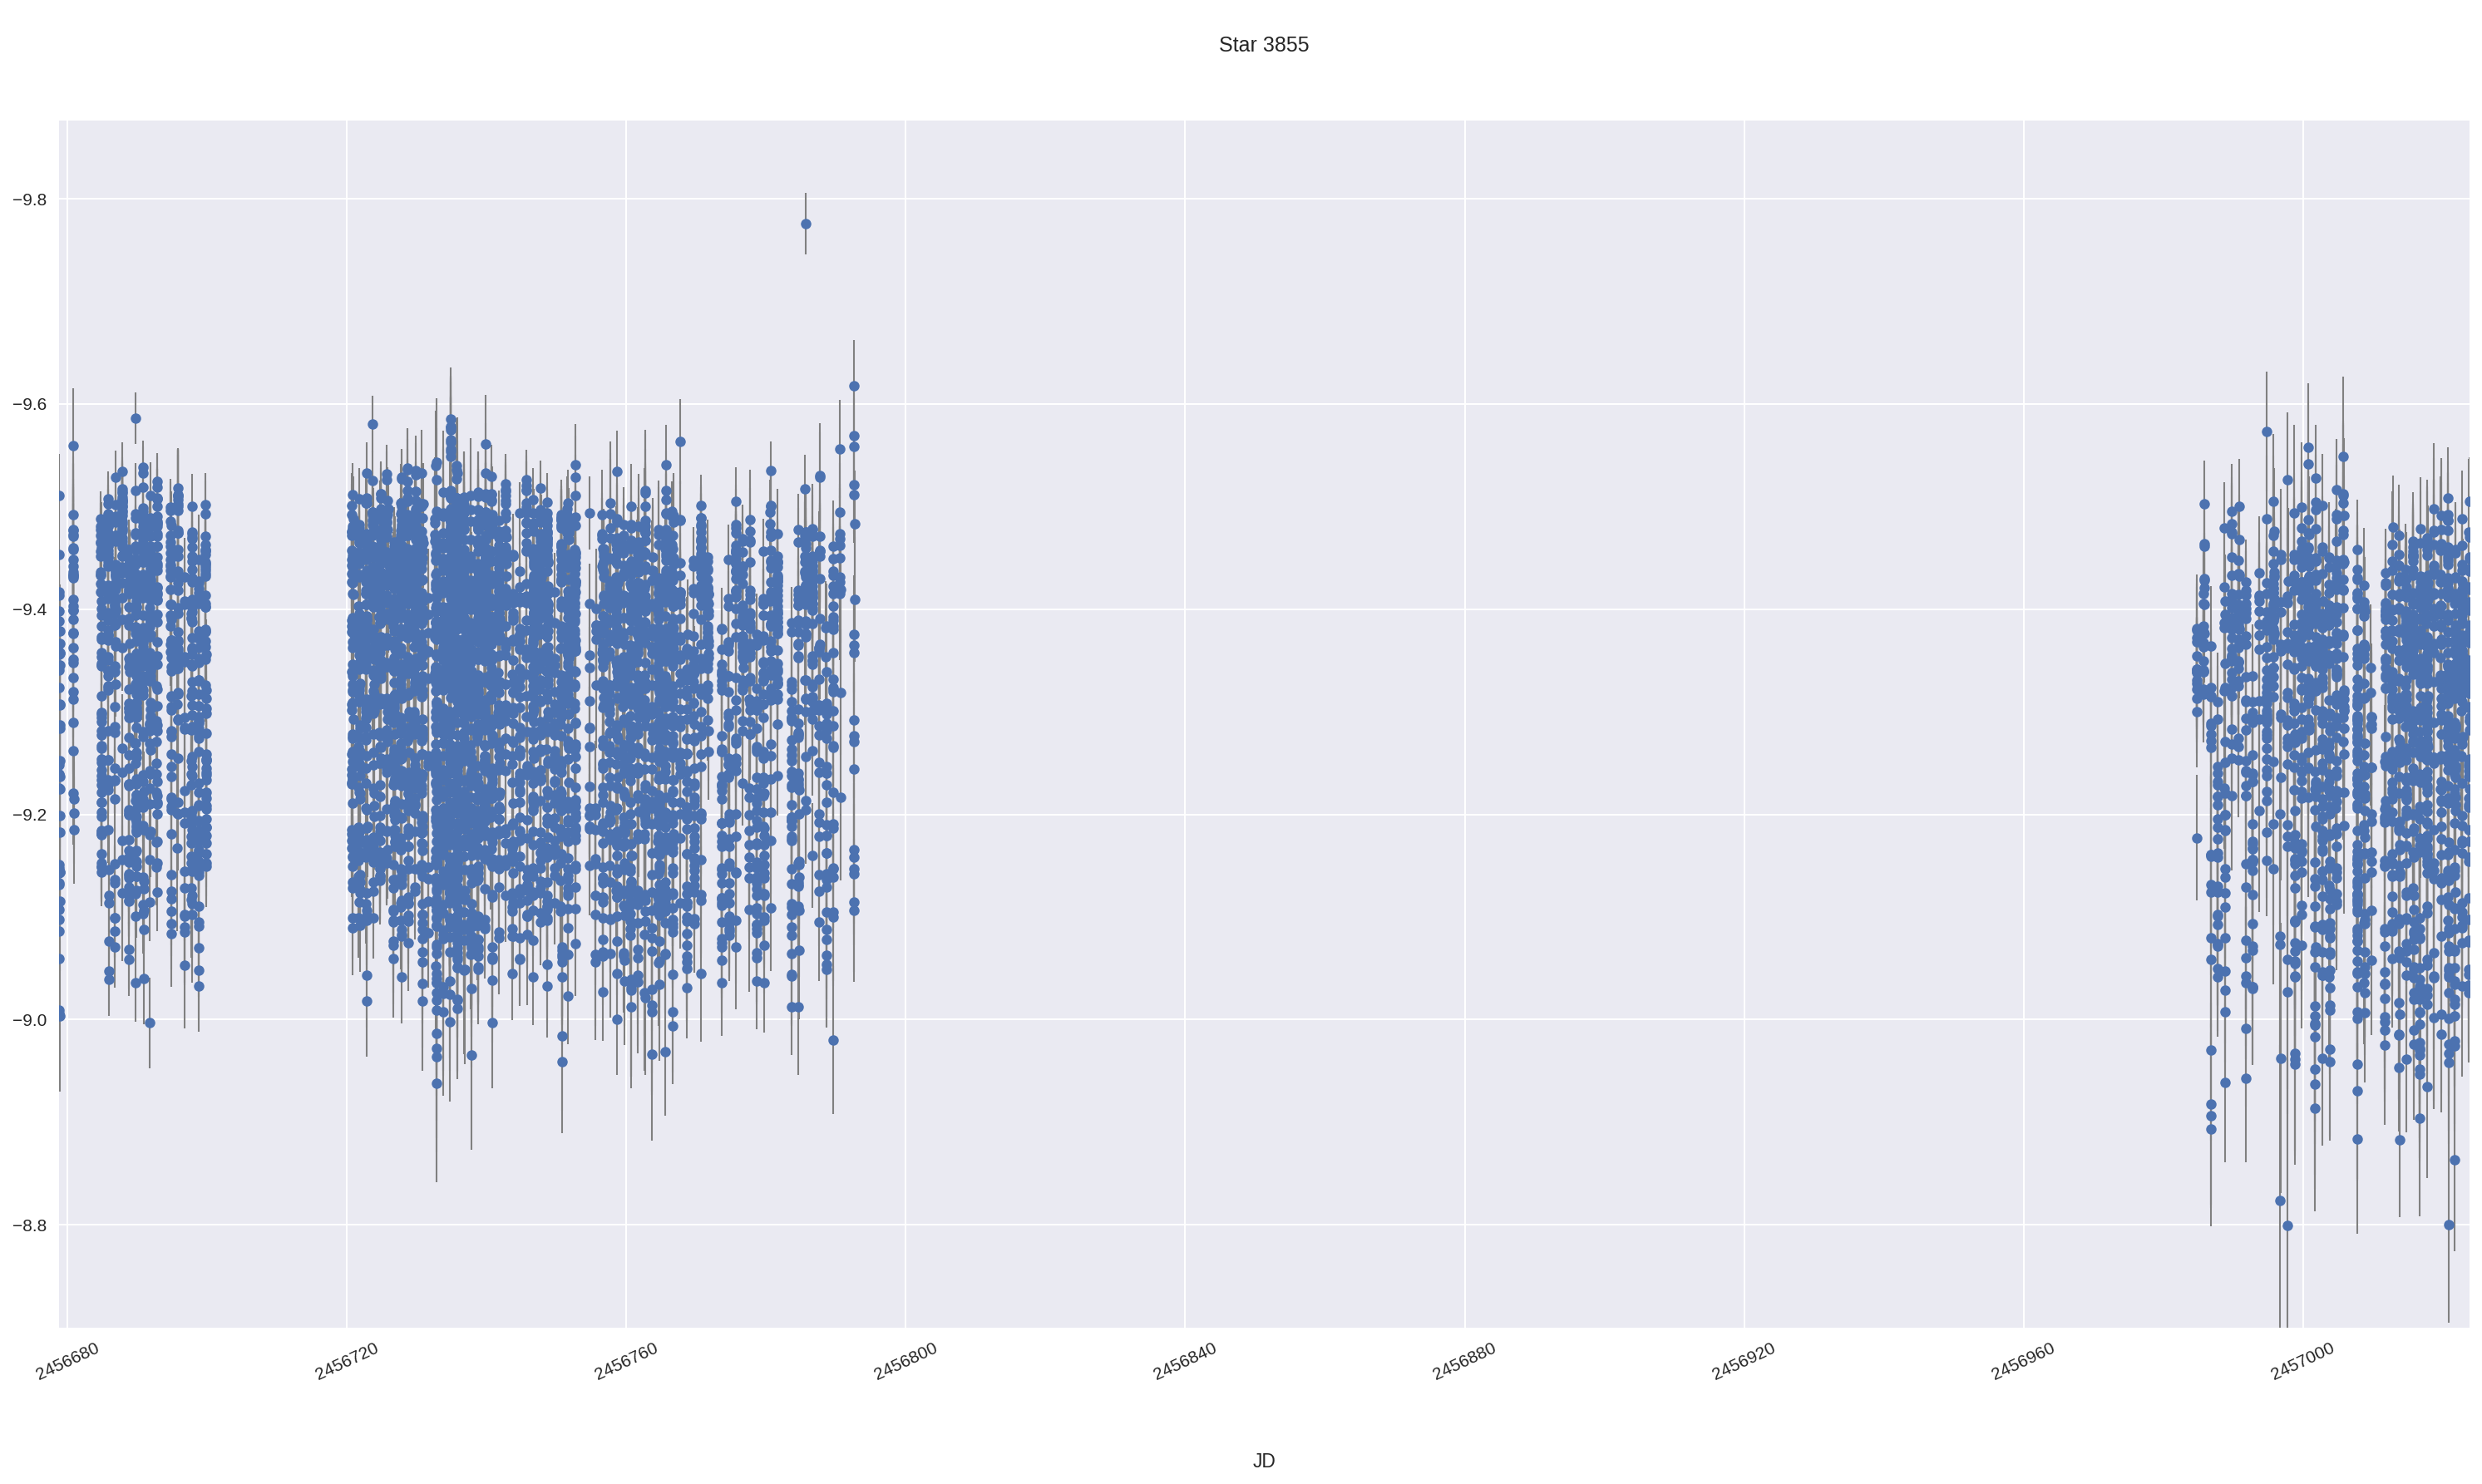

In [8]:
t, lc = plot_star(3855, [2456700.0, 2456720.0])


In [10]:
t

0       2.456687e+06
2       2.456770e+06
4       2.456764e+06
5       2.456753e+06
7       2.456734e+06
            ...     
8080    2.456735e+06
8081    2.456700e+06
8082    2.457008e+06
8084    2.456790e+06
8085    2.456748e+06
Name: realJD, Length: 7047, dtype: float64

In [14]:
sortedt = t.sort_values()

In [21]:
sortedt.describe()

count    7.047000e+03
mean     2.456804e+06
std      1.173315e+02
min      2.456679e+06
25%      2.456732e+06
50%      2.456752e+06
75%      2.456789e+06
max      2.457024e+06
Name: realJD, dtype: float64

In [23]:
utils.jd_filter_df(sortedt, [2.456679e+06, 2.457024e+06 ])

AttributeError: 'Series' object has no attribute 'floatJD'